In [1]:
import cv2
import math
import numpy 
import mediapipe as mp
import matplotlib.pyplot as plt
from time import time


In [2]:
mp_pose=mp.solutions.pose
pose=mp_pose.Pose(static_image_mode=True,min_detection_confidence=0.3,model_complexity=2)
mp_drawing=mp.solutions.drawing_utils

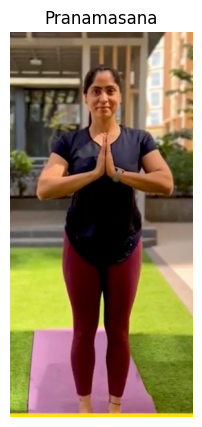

In [3]:
sample_img=cv2.imread("Pranamasana-train.png")
plt.figure(figsize=[10,5])
plt.title("Pranamasana");plt.axis("off")
plt.imshow(sample_img[:,:,::-1])
plt.show()

In [4]:
results=pose.process(cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB))
if results.pose_landmarks:
    for i in range(2):
        print(f"{mp_pose.PoseLandmark(i).name}:\n {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}")


NOSE:
 x: 0.5079041
y: 0.17833313
z: -0.42042977
visibility: 0.9989353

LEFT_EYE_INNER:
 x: 0.5359632
y: 0.16043666
z: -0.3332543
visibility: 0.9979532



In [5]:
image_height,image_width,_=sample_img.shape
if results.pose_landmarks:
    for i in range(5):
        print(f"{mp_pose.PoseLandmark(i).name}:")
        print(f"{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i)].x*image_width}")
        print(f"{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i)].y*image_height}")
        print(f"{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i)].z*image_width}")
        print(f"visibility : {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}")

NOSE:
143.7368637919426
106.64321380853653
-118.9816238284111
visibility : 0.9989352822303772
LEFT_EYE_INNER:
151.6775792837143
95.9411227107048
-94.31096902489662
visibility : 0.9979531764984131
LEFT_EYE:
155.6148670911789
96.53626352548599
-94.51458403468132
visibility : 0.9977903366088867
LEFT_EYE_OUTER:
161.20302039384842
97.06428748369217
-94.44981047511101
visibility : 0.9983162879943848
RIGHT_EYE_INNER:
136.99421456456184
94.93629461526871
-92.11133316159248
visibility : 0.9986633062362671


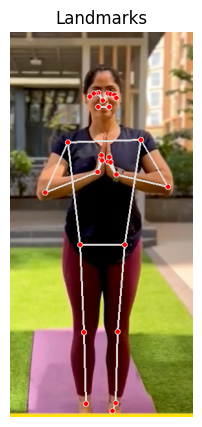

In [6]:
image=sample_img.copy()
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=image,landmark_list=results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
    fig=plt.figure(figsize=[10,5])
    plt.title("Landmarks");plt.axis("off");plt.imshow(image[:,:,::-1]);

<Figure size 1000x500 with 0 Axes>

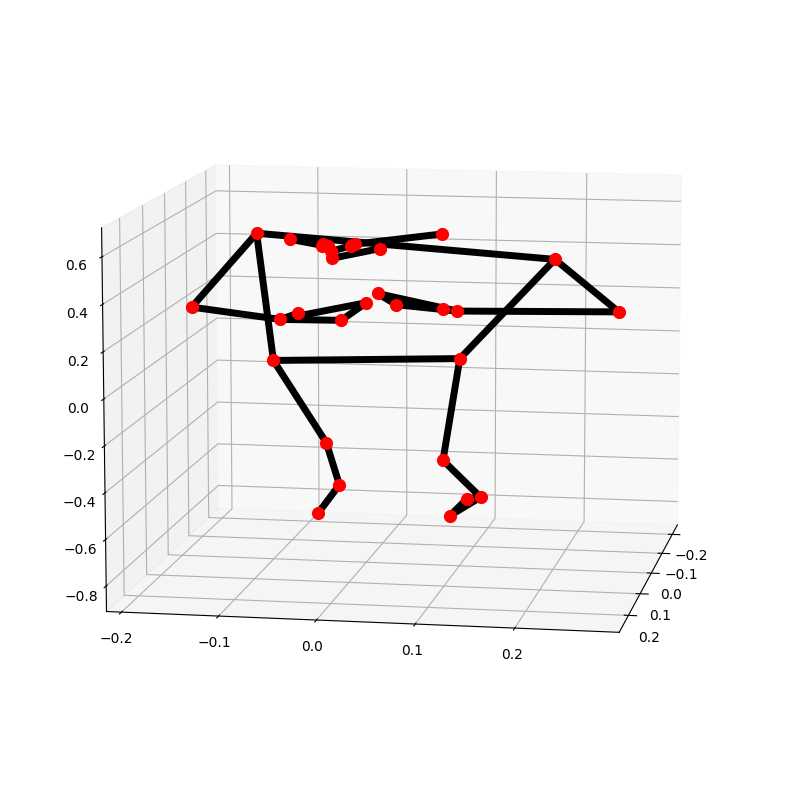

In [7]:
plt.figure(figsize=[10,5])
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)

In [11]:
def detect_position(image,pose,display=True):
    """
    Performs pose detection on an image that is passed 
    Args - 
        image - The image that has to be detected
        pose - pose setup function required to perform pose detection
        display - The function that displays true if the function displays the original, landmarked and the 3d image
    Returns -
        output images of the normal and the landmarked
        landmarks of the detected landmarks converted to their orignal scale
    """
    image=image.copy()
    image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    results=pose.process(image_rgb)
    height,width, _ =image.shape
    landmarks=[]
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=image_rgb,landmark_list=results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x*width),int(landmark.y*height),int(landmark.z*width)))
    if display:
        plt.figure(figsize=[10,5])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis("off")
        plt.subplot(122);plt.imshow(image_rgb[:,:,::-1]);plt.title("Output Image");plt.axis("off")
        plt.figure(figsize=[10,5]);mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS);plt.title("3D Landmarks");plt.axis("off");
    else:
        return image_rgb,landmarks

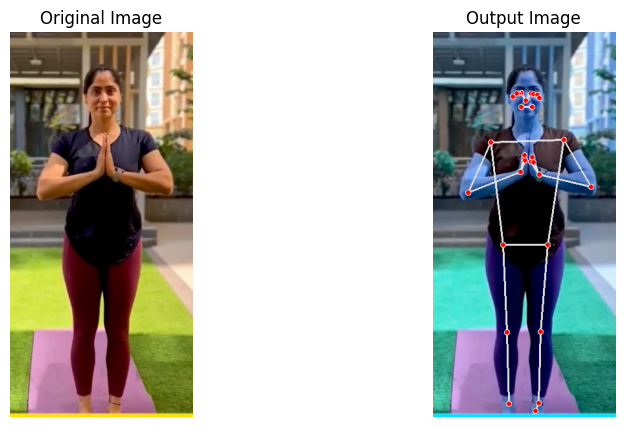

<Figure size 1000x500 with 0 Axes>

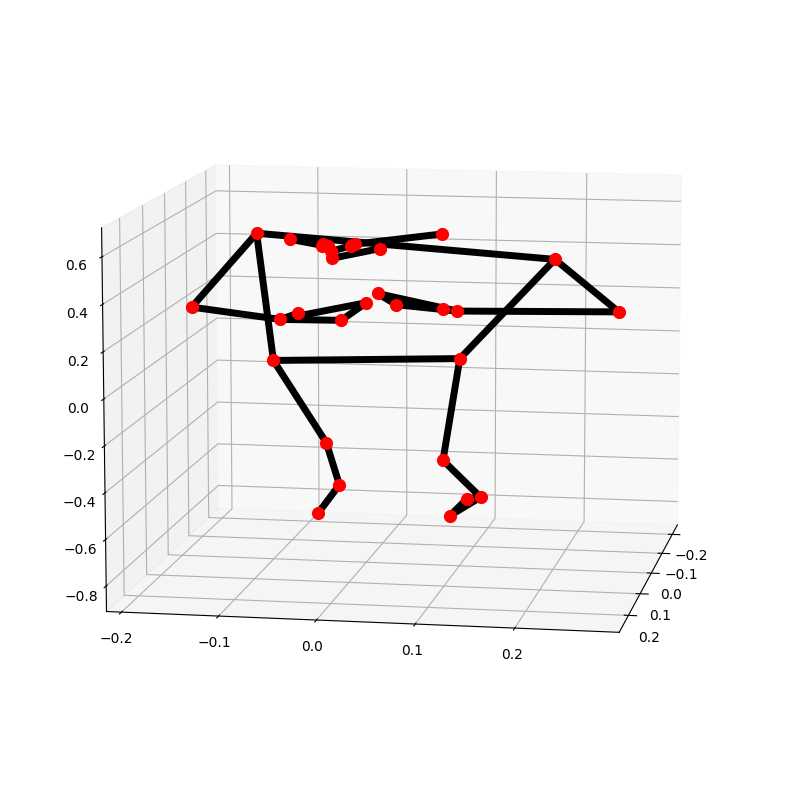

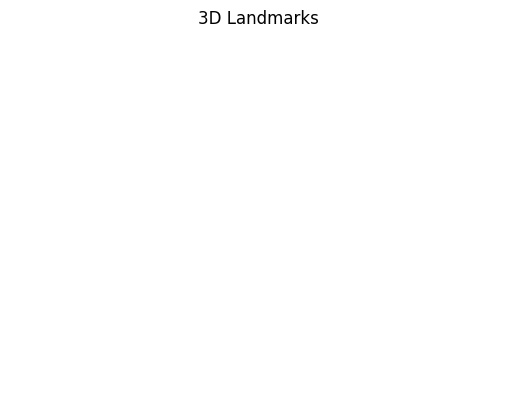

In [12]:
image=cv2.imread("Pranamasana-train.png")
detect_position(image,pose,display=True)